   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   56                  76                       1   
1           2   69                  65                      16   
2           3   46                  73                      61   
3           4   32                 132                      64   
4           5   60                 110                      63   

   Account Age (years)  Total Orders  Avg Order Value ($)  
0                    9            47               315.81  
1                    9            86               274.49  
2                    2            56               224.98  
3                    6            94               292.97  
4                    2            63               184.13  
Features scaled
   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1   56                  76                       1   
1           2   69                  65                      16   
2           3   46           

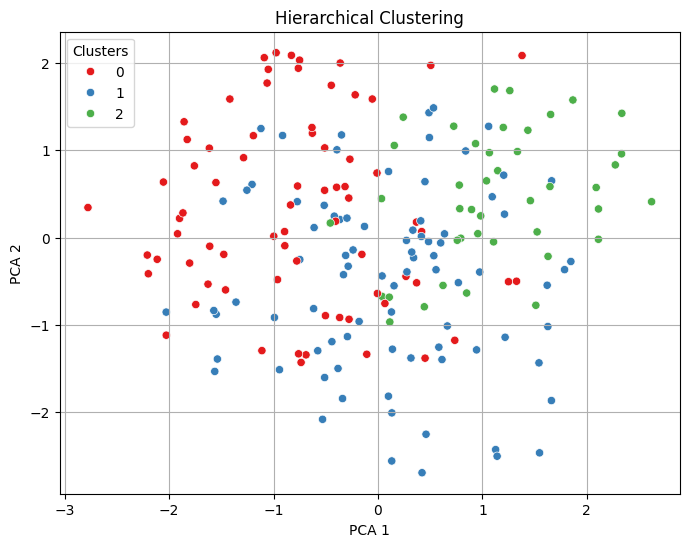

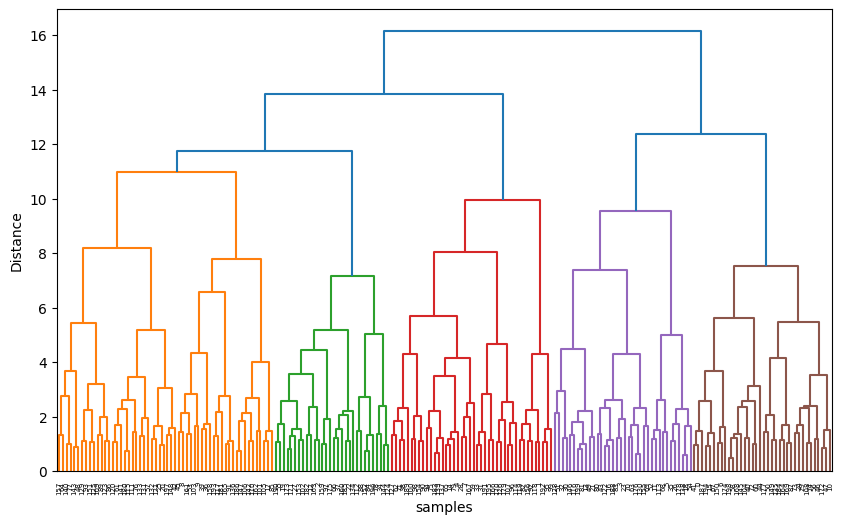

In [ ]:
#7.Write a python program to implement Hierarchical clustering.
import pandas as pd
data =pd.read_csv( "/content/ecommerce_customers (1).csv")
print(data.head())

x=data.drop(columns=['CustomerID'])

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

x_scaled=scalar.fit_transform(x)
print("Features scaled")

print(data.head())
print(pd.DataFrame(x_scaled,columns=x.columns).head())

from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=3)
data['clusters']=model.fit_predict(x_scaled)

print("cluster count is")
print(data['clusters'].value_counts().sort_index())

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=data['clusters'], palette='Set1')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Hierarchical Clustering")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(x_scaled,method="ward")
plt.figure(figsize=(10, 6))
dendrogram(linked,orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.xlabel("samples")
plt.ylabel("Distance")
plt.show()